In [10]:
# Basic scientific stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for machine learning utilities
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, recall_score, 
    f1_score, roc_curve, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



Bias and Variance
==
**Bias** refers to the error due to overly simplistic assumptions in the learning algorithm.
- High bias models tend to underfit the data.
- Example: tryint to use linear models on highly non-linear data.

**Variance** refers to the model's sensitivity to fluctuations in the training data.
- High variance models tend to overfit the training data and perform poorly on unseen data.
- Example: Very deep decision trees memorizing noise.

The goal is to **find a balance** between bias and variance for better generalization.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dataset: intentionally harder and with fewer samples
X, y = make_classification(
    n_samples=150,  # smaller sample size to provoke overfitting
    n_features=10,
    n_informative=5,
    n_redundant=2,
    flip_y=0.15,  # introduce label noise
    class_sep=0.5,  # less separation between classes
    random_state=0
)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0
)

# Simple model: high bias
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#extract predictions
y_pred_lr = logreg.predict(X_test)

# Complex model: high variance
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=0)
deep_tree.fit(X_train, y_train)

# Accuracy on train and test sets
def print_acc(model, name):
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    print(f"{name}\nTrain Acc: {acc_train:.2f} | Test Acc: {acc_test:.2f}\n")

print_acc(logreg, "Logistic Regression (High Bias)")
print_acc(deep_tree, "Deep Decision Tree (High Variance)")


Logistic Regression (High Bias)
Train Acc: 0.60 | Test Acc: 0.53

Deep Decision Tree (High Variance)
Train Acc: 1.00 | Test Acc: 0.60



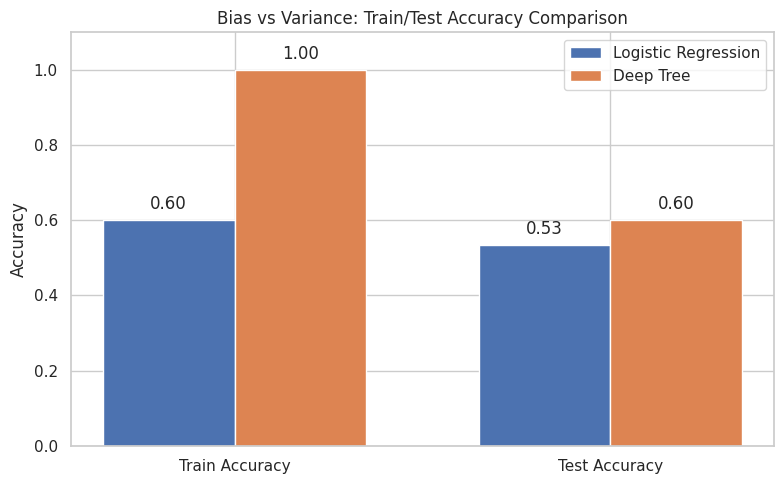

In [12]:
# Get accuracy scores
logreg_train_acc = logreg.score(X_train, y_train)
logreg_test_acc = logreg.score(X_test, y_test)

tree_train_acc = deep_tree.score(X_train, y_train)
tree_test_acc = deep_tree.score(X_test, y_test)

# Bar chart for comparison
labels = ['Train Accuracy', 'Test Accuracy']
logreg_scores = [logreg_train_acc, logreg_test_acc]
tree_scores = [tree_train_acc, tree_test_acc]

x = np.arange(len(labels))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, logreg_scores, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, tree_scores, width, label='Deep Tree')

# Labels and formatting
ax.set_ylabel('Accuracy')
ax.set_title('Bias vs Variance: Train/Test Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()

# Annotate each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


Confusion matrix 
===

A **confusion matrix** is a simple and intuitive tool to summarize prediction results for classification problems.

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |

From this, we derive the following metrics:

- **Accuracy** = (TP + TN) / Total
- **Precision** = TP / (TP + FP) : How many predicted positives are truly positive?
- **Recall (Sensitivity)** = TP / (TP + FN) : How many actual positives were detected?
- **F1 Score** = 2 × (Precision × Recall) / (Precision + Recall) : Harmonic mean of precision and recall

These metrics are especially useful when the data is **imbalanced**.

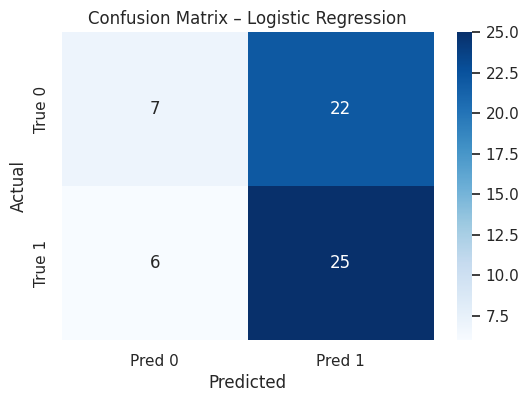

In [13]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

# Display with seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()


In [14]:
# Print classification report
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Extract individual metrics
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.54      0.24      0.33        29
           1       0.53      0.81      0.64        31

    accuracy                           0.53        60
   macro avg       0.54      0.52      0.49        60
weighted avg       0.54      0.53      0.49        60

Recall (Sensitivity): 0.81
F1 Score: 0.64


## ROC Curve and AUC (Area Under the Curve)

The **ROC curve (Receiver Operating Characteristic)** shows the tradeoff between:

- **True Positive Rate (Recall)** on the Y-axis
- **False Positive Rate** on the X-axis

A perfect classifier would reach the top-left corner of the ROC plot.

- The **AUC** (Area Under the Curve) is a single number summary of the ROC curve.
  - AUC = 1.0 : Perfect classification
  - AUC = 0.5 : No better than random guessing

ROC and AUC are especially useful for **binary classifiers** and when evaluating **probabilistic models**.


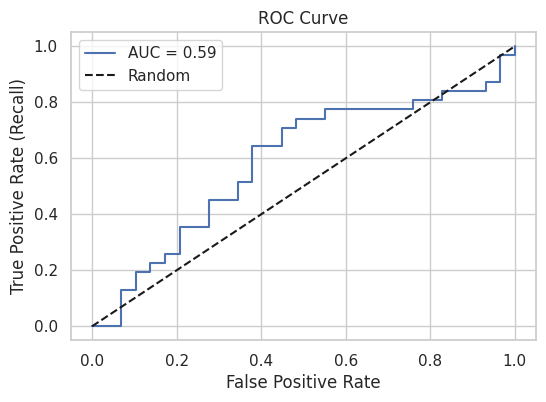

In [15]:
# Get predicted probabilities
y_proba_lr = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc_score = roc_auc_score(y_test, y_proba_lr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


## Cross-Validation for Precision Metrics

**Cross-validation** is a technique to evaluate the stability and generalizability of a model.

- The dataset is split into multiple **folds**
- The model is trained and tested on different splits
- Metrics  are averaged over all folds

Benefits:
- Reduces bias from a single train/test split
- Provides more **robust and reliable** estimates
- Helps identify overfitting

Common approach: **Stratified K-Fold**, which preserves class proportions across folds.


In [16]:
# Use stratified k-fold to maintain class balance in folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated F1 score
cv_f1_scores = cross_val_score(logreg, X, y, scoring='f1', cv=skf)

print("Cross-validated F1 scores:", cv_f1_scores)
print("Mean F1 score:", np.mean(cv_f1_scores))


Cross-validated F1 scores: [0.64516129 0.4137931  0.64864865 0.58823529 0.7027027 ]
Mean F1 score: 0.599708207847971


## Other Useful Evaluation Tools

Besides standard metrics, here are additional tools to improve model evaluation:

- **Balanced Accuracy**: Especially important when classes are imbalanced.
  
  Balanced Accuracy = 1/2* TP/(TP+FN) + TN/(TN+FP)
  

- **Precision-Recall Curve**: More informative than ROC when dealing with imbalanced datasets.

- **Confusion Matrix Normalized**: Helps interpret proportions, not just counts.

Always tailor your evaluation strategy to the **problem context**: imbalanced data, false negative cost, etc.


In [17]:
# Balanced Accuracy (especially useful for imbalanced datasets)
from sklearn.metrics import balanced_accuracy_score

# Simulate an imbalanced dataset (we control the imbalance with weights)
X_imb, y_imb = make_classification(n_samples=500, weights=[0.85, 0.15], random_state=42)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_imb, y_imb, test_size=0.3, stratify=y_imb, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_i, y_train_i)
y_pred_i = clf.predict(X_test_i)

balanced_acc = balanced_accuracy_score(y_test_i, y_pred_i)
print(f"Balanced Accuracy (Imbalanced Data): {balanced_acc:.2f}")


Balanced Accuracy (Imbalanced Data): 0.92
